In [50]:
def brightness(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,:] = image1[:,:,:]*0.75
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
#     # Rotation

#     ang_rot = np.random.uniform(ang_range)-ang_range/2
#     rows,cols,ch = img.shape    
#     Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

#     # Translation
#     tr_x = trans_range*np.random.uniform()-trans_range/2
#     tr_y = trans_range*np.random.uniform()-trans_range/2
#     Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

#     # Shear
#     pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    img = augment_brightness_camera_images(img)
    
    return img

In [4]:
from PIL import Image
image = cv2.imread('Test images/hand1.jpg')
new = transform_image(image,30,30,50)
cv2.imshow('new',new)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.axis('off')

NameError: name 'pt1' is not defined

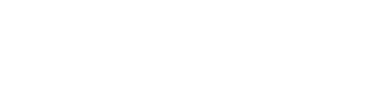

In [24]:
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(5):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,20,10,5)

    plt.subplot(10,10,i+1)
    cv2.imshow('new',img)
    cv2.waitKey(0)
    plt.axis('off')

cv2.destroyAllWindows()

In [9]:
from numpy import expand_dims
import os
import cv2
import keras.preprocessing.image as k
from matplotlib import pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [53]:
for i in range(1,205):
    img=cv2.imread('Sign-Language-Digits-Dataset-master/Dataset/0/0(' + str(i) + ').JPG')
    horiz_flip(img,i)
    rotate(img,-30,i)
    new = brightness(img)
    cv2.imshow('new',new)
    cv2.waitKey(0)
    
    break
    
cv2.destroyAllWindows()

In [28]:
#horizontal shift augmentation
#load the image
def horiz_shift(img):
    data = k.img_to_array(img)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = k.ImageDataGenerator(width_shift_range=[-40,40])
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(9):
        # define subplot
        pyplot.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        pyplot.imshow(image)
        #cv2.imwrite(os.path.join('pos','glass8horizont'+str(i)+'.jpg'),image)
    # show the figure
    pyplot.show()

In [52]:
#rotate image
def rotate(img,deg,i):
    row,col,c=img.shape
    M = cv2.getRotationMatrix2D((col/2,row/2),deg,1)
    img=cv2.warpAffine(img,M,(col,row))
    cv2.imshow('new',img)
    cv2.waitKey(0)
    #cv2.imwrite("Sign-Language-Digits-Dataset-master/Dataset/new/" + str(i) + ".jpg",img)

In [8]:
#horizontal flip
# load the image
def horiz_flip(img,i):
    new=cv2.flip(img,1)
    cv2.imshow('img',new)
    cv2.waitKey(0)
    #cv2.imwrite(os.path.join('pos','glass8flipp'+str(i)+'.jpg'),image)
    # show the figure
    

In [ ]:
#using image data gen

def create_train_and_validation(train_data_dir):
    if train_data_dir=='Health':
        class_mode='binary'
    else:
        class_mode='categorical'

    train_datagen = ImageDataGenerator(rescale = 1./256,
                                   rotation_range = 60,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=10,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   data_format ="channels_last",validation_split=0.2) 

    train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                        target_size =(img_width, img_height),
                                                        batch_size = batch_size,
                                                        class_mode = class_mode,
                                                        subset='training') 

    validation_generator = train_datagen.flow_from_directory(train_data_dir,
                                                            target_size =(img_width, img_height),
                                                            batch_size = batch_size,
                                                            class_mode = class_mode,
                                                            subset='validation') 
    return train_datagen,train_generator,validation_generator
